In [2]:
import pandas as p
import re
import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df_fake= p.read_csv(r'C:\Users\MOHAMED\Downloads\Fake_news\Fake_news\Fake.csv')
df_real= p.read_csv(r'C:\Users\MOHAMED\Downloads\Fake_news\Fake_news\True.csv')


In [3]:
#printing first five rows 
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_real.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
df_fake.info(),df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


(None, None)

In [5]:
df_fake.duplicated(keep=False)

0        False
1        False
2        False
3        False
4        False
         ...  
23476    False
23477    False
23478    False
23479    False
23480    False
Length: 23481, dtype: bool

In [6]:
df_real.duplicated(keep=False)

0        False
1        False
2        False
3        False
4        False
         ...  
21412    False
21413    False
21414    False
21415    False
21416    False
Length: 21417, dtype: bool

In [17]:
#inserting  a column called "label" for fake and real news dataset to categories fake and true news
df_fake['label']= 0
df_real['label'] = 1

In [18]:
df_fake.shape,df_real.shape


((23481, 5), (21417, 5))

In [19]:
df_real.columns , df_fake.columns


(Index(['title', 'text', 'subject', 'date', 'label'], dtype='object'),
 Index(['title', 'text', 'subject', 'date', 'label'], dtype='object'))

In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
df_merge= p.concat([df_fake,df_real], axis=0,ignore_index=True)

In [22]:
df_merge.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
df_merge.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

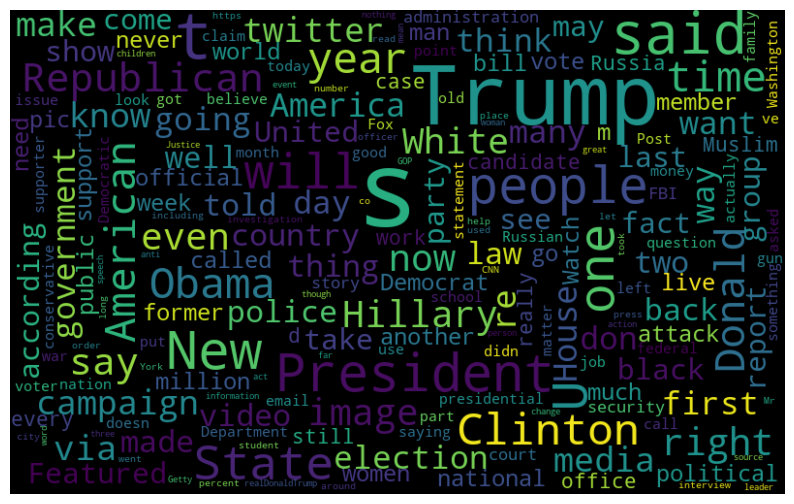

In [25]:
#word cloud for fake news
from wordcloud import WordCloud
fake = df_merge[df_merge['label']== 0]
all_words = ' '.join([text for text in fake.text])
wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110, collocations= False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

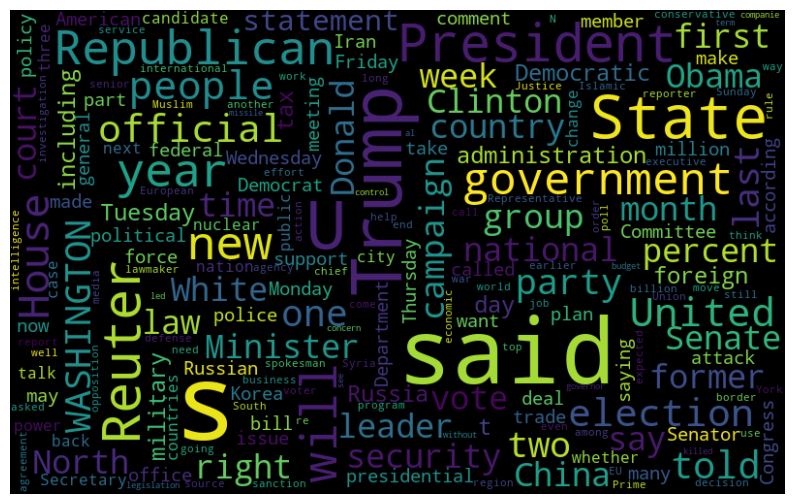

In [28]:
#word cloud for Real news
from wordcloud import WordCloud
real = df_merge[df_merge['label']== 1]
all_words = ' '.join([text for text in real.text])
wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110, collocations= False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

<AxesSubplot:>

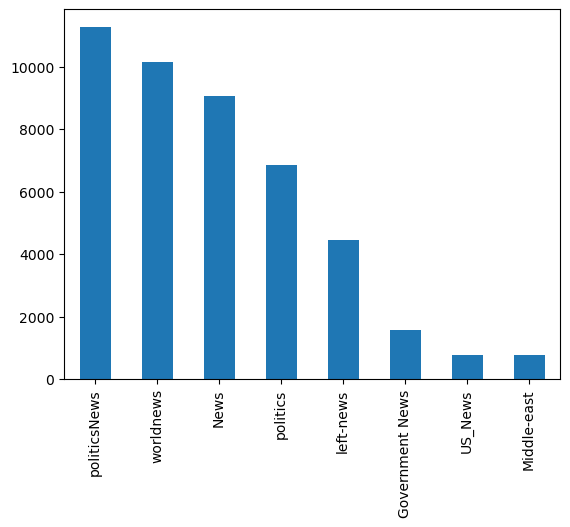

In [16]:
df_marge.subject.value_counts().plot.bar(x= "df_marge.subject")

In [13]:
df_subject=df_merge.groupby(['subject'])
for key, item in df_subject:
    print(df_subject.get_group(key), "\n\n")

                                                   title  \
15891  TOP FIVE Food Stamp Fraud Takedowns of 2017…Do...   
15892  HOUSE INTEL Slaps Subpoenas on McCain Institut...   
15893  PRICELESS! WATCH MSNBC HOST’S Shocked Response...   
15894  CBS HIT JOB On New Tax Bill Backfires When Acc...   
15895  ‘MORNING JOE’ PANEL Says Nikki Haley “Embarras...   
...                                                  ...   
17456  SHERIFF WON’T ENFORCE GUN CONTROL LAW HE CALLS...   
17457  ILLEGAL INVASION CONTINUES: NYC RAMPING UP TO ...   
17458  NO TOILET PAPER?! SOCIALISM IS IN ITS FINAL ST...   
17459  MarkLevin is Freaking Awesome: Obama negotiate...   
17460  ENTITLED IRS ETHICS LAWYER DISBARRED FOR ETHIC...   

                                                    text          subject  \
15891   After the Obama years of record food stamp us...  Government News   
15892  Please see our previous report below on the Mc...  Government News   
15893  THIS IS PRICELESS! The video below shows 

In [14]:
df_merge.sample(15)

,title,text,subject,date,label
36202,Egyptian Muslim leader rejects meeting with U....,CAIRO (Reuters) - One of Egypt s top Muslim le...,worldnews,"December 8, 2017",1
20970,"CHILD PORN, JIHADI WEBSITES Found On Phone Aft...",Doesn t America already have enough legal citi...,left-news,"Feb 21, 2016",0
16826,ANGELINA JOLIE HUMILIATED Barack Obama On Worl...,It s good to know there are a few Hollywood ce...,Government News,"Jan 18, 2016",0
8601,Oops: Ammosexual Playing With Gun During Beng...,Thinking about going to the movies? You might ...,News,"January 22, 2016",0
2149,Oxford Fellow GLORIOUSLY Buries Trump For Try...,"Donald Trump just got owned.On Monday, the Con...",News,"March 14, 2017",0
11215,DID CHILD PORN CASE EXPOSE Deep Ties Between G...,"According to court records, Geek Squad technic...",politics,"Apr 3, 2017",0
42686,First refugees taken from offshore detention u...,Sydney (Reuters) - Refugees have left one of A...,worldnews,"September 24, 2017",1
40330,China's Communist Party says still talking to ...,BEIJING (Reuters) - China s ruling Communist P...,worldnews,"October 21, 2017",1
163,This 2016 Hannity Tweet Is Now Like A Knife I...,No one on earth has been a bigger cheerleader ...,News,"October 30, 2017",0
6830,WATCH: Fox News A-Hole Spends Tax Day Shaming...,Fox News raging pile of upper one percent gar...,News,"April 18, 2016",0


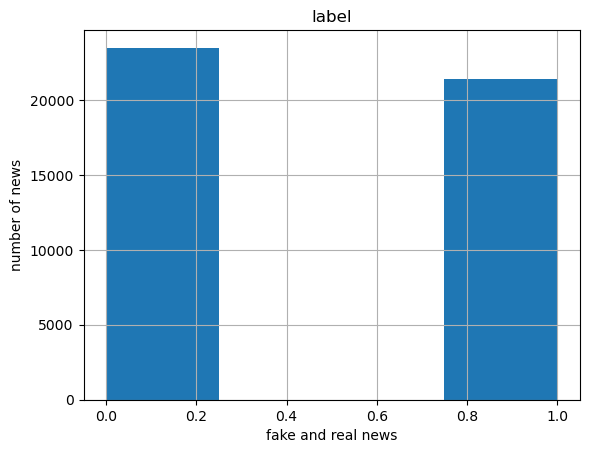

In [15]:
df_merge[['label']].hist(bins=4)

plt.xlabel("fake and real news")
plt.ylabel("number of news")

plt.show()

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

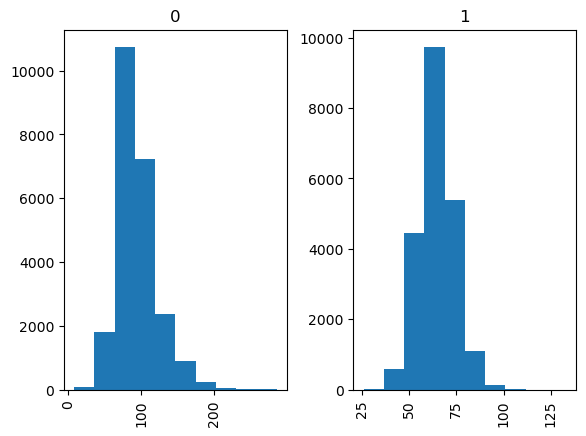

In [17]:
# the number of characters presents in each title by labels
df_merge['title'].str.len().hist(by=df_merge['label'])

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

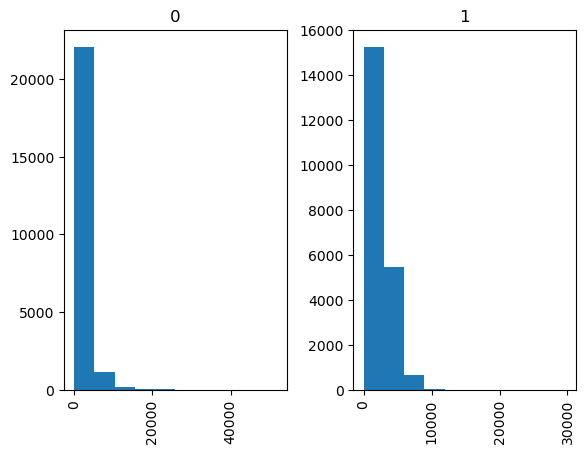

In [18]:
#the numbers of characters present in each text by labels
df_merge['text'].str.len().hist(by= df_merge['label'])

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

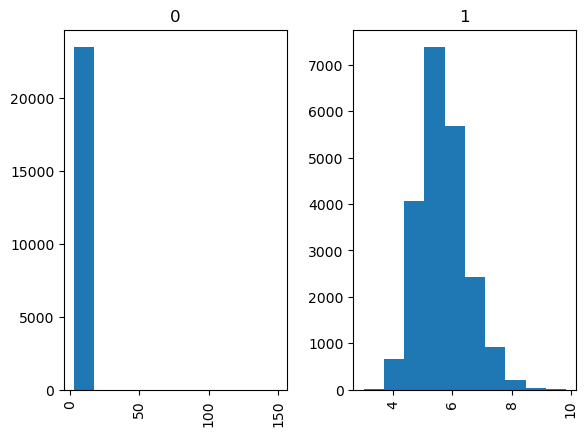

In [19]:
#word level analysis of title
df_merge['title'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).hist(by=df_merge['label'])

C:\Users\MOHAMED\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\MOHAMED\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

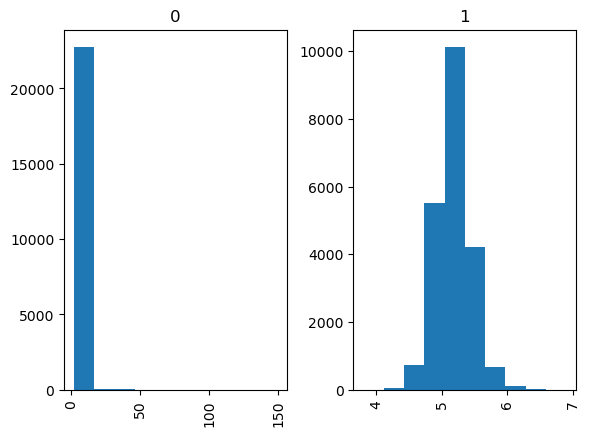

In [20]:
df_merge['text'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).hist(by=df_merge['label'])

In [101]:
#remove stopwords from title and text by label
messages_fake=[df_marge.label==0].copy()
messages_not_fake=[df_marge.label==1].copy()

In [21]:
from collections import defaultdict ,Counter
import string

<AxesSubplot:>

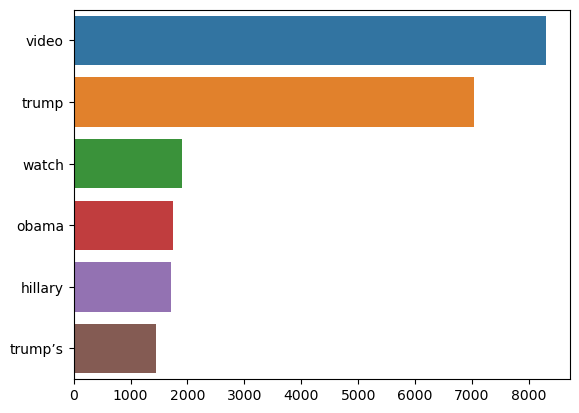

In [22]:
# Corpus analysis corpus_title_fake
stop=set(stopwords.words('english'))
df_fake['title'] = df_fake['title'].str.lower()
df_fake['title'] = df_fake['title'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
new=df_fake['title'].str.split()
new= new.values.tolist()

corpus_title_fake=[word for i in new for word in i]

counter=Counter(corpus_title_fake)
most=counter.most_common()
x, y= [], []
for word,count in most[:25]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

<AxesSubplot:>

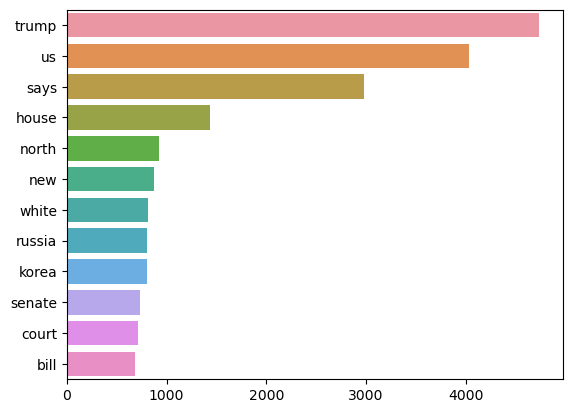

In [23]:
#Corpus analysis corpus_title_real
stop=set(stopwords.words('english'))
df_real['title'] = df_real['title'].str.lower()
df_real['title'] = df_real['title'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
new=df_real['title'].str.split()
new= new.values.tolist()

corpus_title_real=[word for i in new for word in i]

counter=Counter(corpus_title_real)
most=counter.most_common()
x, y= [], []
for word,count in most[:25]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

<AxesSubplot:>

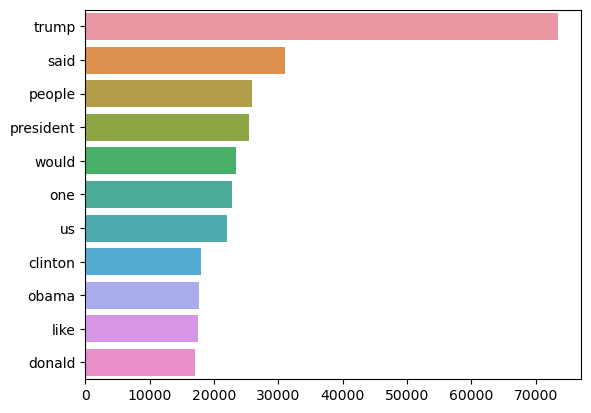

In [24]:
#Corpus analysis for corpus_text_fake
stop=set(stopwords.words('english'))
df_fake['text'] = df_fake['text'].str.lower()
df_fake['text'] = df_fake['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
new=df_fake['text'].str.split()
new= new.values.tolist()

corpus_text_fake=[word for i in new for word in i]

counter=Counter(corpus_text_fake)
most=counter.most_common()
x, y= [], []
for word,count in most[:70]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)


<AxesSubplot:>

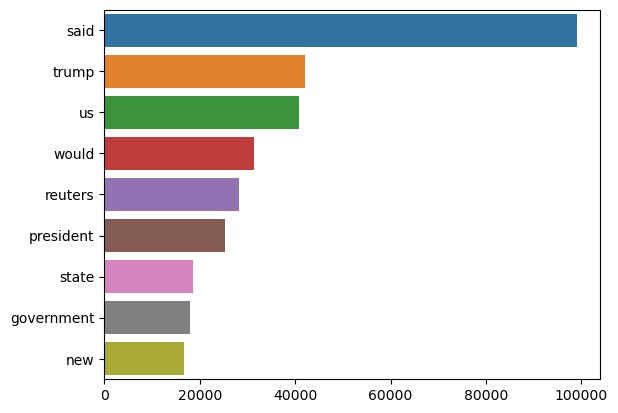

In [25]:
stop=set(stopwords.words('english'))
df_real['text'] = df_real['text'].str.lower()
df_real['text'] = df_real['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
new=df_real['text'].str.split()
new= new.values.tolist()

corpus_text_real=[word for i in new for word in i]

counter=Counter(corpus_text_real)
most=counter.most_common()
x, y= [], []
for word,count in most[:50]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

# Removing unnecessary columns in dataset

In [26]:
df= df_merge.drop(["title","subject","date"], axis= 1)


In [27]:
df.isnull().sum()

text     0
label    0
dtype: int64

# Converting all characters into lowercase

In [28]:

df['clean_text']= df['text'].str.lower()
df.head(20)

,text,label,clean_text
0,Donald Trump just couldn t wish all Americans ...,0,donald trump just couldn t wish all americans ...
1,House Intelligence Committee Chairman Devin Nu...,0,house intelligence committee chairman devin nu...
2,"On Friday, it was revealed that former Milwauk...",0,"on friday, it was revealed that former milwauk..."
3,"On Christmas day, Donald Trump announced that ...",0,"on christmas day, donald trump announced that ..."
4,Pope Francis used his annual Christmas Day mes...,0,pope francis used his annual christmas day mes...
5,The number of cases of cops brutalizing and ki...,0,the number of cases of cops brutalizing and ki...
6,Donald Trump spent a good portion of his day a...,0,donald trump spent a good portion of his day a...
7,In the wake of yet another court decision that...,0,in the wake of yet another court decision that...
8,Many people have raised the alarm regarding th...,0,many people have raised the alarm regarding th...
9,Just when you might have thought we d get a br...,0,just when you might have thought we d get a br...


# Removing Punctuations 

In [29]:
import re
import string


In [30]:
def remove_punctuations(text):
    punctuations= string.punctuation
    return text.translate(str.maketrans('','',punctuations))
#removing special character

def remove_special(text):
    #special= '[^\x00-\x7F]'
    stem1=re.sub(r'[^\x00-\x7F]',"",text)
    
    return stem1


#applying the remove_special function to clean_text
df['clean_text']=df['clean_text'].apply(lambda x: remove_special(x))



#applying the remove_punctuation function to clean_text
df['clean_text']= df['clean_text'].apply(lambda x: remove_punctuations(x))
print(df.head(10))



                                                text  label  \
0  Donald Trump just couldn t wish all Americans ...      0   
1  House Intelligence Committee Chairman Devin Nu...      0   
2  On Friday, it was revealed that former Milwauk...      0   
3  On Christmas day, Donald Trump announced that ...      0   
4  Pope Francis used his annual Christmas Day mes...      0   
5  The number of cases of cops brutalizing and ki...      0   
6  Donald Trump spent a good portion of his day a...      0   
7  In the wake of yet another court decision that...      0   
8  Many people have raised the alarm regarding th...      0   
9  Just when you might have thought we d get a br...      0   

                                          clean_text  
0  donald trump just couldn t wish all americans ...  
1  house intelligence committee chairman devin nu...  
2  on friday it was revealed that former milwauke...  
3  on christmas day donald trump announced that h...  
4  pope francis used his annual

# Removal stopword

In [31]:
from nltk.corpus import stopwords

In [32]:
STOPWORDS= set(stopwords.words('english'))
print(STOPWORDS)

{'at', 'they', "didn't", "that'll", 'own', 'being', 'same', "you'll", 't', 'no', 'wouldn', 'yourselves', 'aren', 'a', 'weren', 'because', 'its', 'between', 'above', 'ain', 'll', 'with', 'you', 'to', 'during', 'mustn', 'am', 'the', 'had', 'if', 'needn', 'not', 'or', "hadn't", 'over', 'myself', 'been', 'more', 'hadn', 'haven', 'do', 'only', 'now', 'your', 've', 'whom', "you'd", 'once', 'so', 'very', 'them', 'should', 'doesn', 'shan', 'up', "should've", 'won', 'will', 'this', 'don', "mightn't", 'their', "wouldn't", 'nor', 'i', 'into', "isn't", 'yours', 'hers', 'other', 'through', 'mightn', 'but', 'does', 'such', 'itself', 'off', 'it', 'all', 'most', 'd', 'as', 'didn', 'below', 'again', 'are', 'what', "haven't", 'both', 'and', 'further', 'when', 'how', "she's", 'isn', 'than', 'he', 'himself', 'have', 'our', "wasn't", 'an', "mustn't", 'after', 'theirs', 'she', 'y', 'were', 'in', 'too', 'doing', 'did', 'that', 'while', 'him', 'yourself', 'on', 'few', "couldn't", 'then', "shouldn't", 'is', 'w

In [33]:
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])


df['clean_text']= df['clean_text'].apply(lambda x : remove_stopwords(x))
print(df.head(5))

                                                text  label  \
0  Donald Trump just couldn t wish all Americans ...      0   
1  House Intelligence Committee Chairman Devin Nu...      0   
2  On Friday, it was revealed that former Milwauk...      0   
3  On Christmas day, Donald Trump announced that ...      0   
4  Pope Francis used his annual Christmas Day mes...      0   

                                          clean_text  
0  donald trump wish americans happy new year lea...  
1  house intelligence committee chairman devin nu...  
2  friday revealed former milwaukee sheriff david...  
3  christmas day donald trump announced would bac...  
4  pope francis used annual christmas day message...  


# Stemming Words

In [34]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [35]:



def stemm_words(text):
    stemmer= PorterStemmer()
    
    stm= " ".join([stemmer.stem(word) for word in text.split()])

    
    return stm

df['clean_text']= df['clean_text'].apply(lambda x: stemm_words(x))
print(df.head(5))








                                                text  label  \
0  Donald Trump just couldn t wish all Americans ...      0   
1  House Intelligence Committee Chairman Devin Nu...      0   
2  On Friday, it was revealed that former Milwauk...      0   
3  On Christmas day, Donald Trump announced that ...      0   
4  Pope Francis used his annual Christmas Day mes...      0   

                                          clean_text  
0  donald trump wish american happi new year leav...  
1  hous intellig committe chairman devin nune go ...  
2  friday reveal former milwauke sheriff david cl...  
3  christma day donald trump announc would back w...  
4  pope franci use annual christma day messag reb...  


In [36]:
import nltk
nltk.download('omw-1.4')
def lemmatize_word(text):
    lemmatizer= WordNetLemmatizer()
    lemmas= " ".join([lemmatizer.lemmatize(word)for word in text.split()])
    return lemmas
df['clean_text']= df['clean_text'].apply(lambda x: lemmatize_word(x))
print(df.head(5))


[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


                                                text  label  \
0  Donald Trump just couldn t wish all Americans ...      0   
1  House Intelligence Committee Chairman Devin Nu...      0   
2  On Friday, it was revealed that former Milwauk...      0   
3  On Christmas day, Donald Trump announced that ...      0   
4  Pope Francis used his annual Christmas Day mes...      0   

                                          clean_text  
0  donald trump wish american happi new year leav...  
1  hous intellig committe chairman devin nune go ...  
2  friday reveal former milwauke sheriff david cl...  
3  christma day donald trump announc would back w...  
4  pope franci use annual christma day messag reb...  


In [37]:
from nltk.tokenize import word_tokenize

In [38]:
def token(text):
    tk=word_tokenize(text)
    return tk
df['clean_text']=df['clean_text'].apply(lambda x:token(x))
df.head(5)

,text,label,clean_text
0,Donald Trump just couldn t wish all Americans ...,0,"[donald, trump, wish, american, happi, new, ye..."
1,House Intelligence Committee Chairman Devin Nu...,0,"[hous, intellig, committe, chairman, devin, nu..."
2,"On Friday, it was revealed that former Milwauk...",0,"[friday, reveal, former, milwauke, sheriff, da..."
3,"On Christmas day, Donald Trump announced that ...",0,"[christma, day, donald, trump, announc, would,..."
4,Pope Francis used his annual Christmas Day mes...,0,"[pope, franci, use, annual, christma, day, mes..."


In [ ]:
#import nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [40]:
x=df['clean_text']
y=df['label']

In [41]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20)

In [42]:
print(len(x_test))

8980


In [43]:
print(x_train)

29043    [beij, reuter, china, said, thursday, attach, ...
31142    [helsinki, reuter, former, miss, finland, accu...
12121    [tucker, goe, call, hypocrisi, rich, liber, el...
24620    [new, york, reuter, u, ambassador, unit, natio...
13699    [way, awesom, student, certainli, lack, succee...
                               ...                        
12827    [video, post, donald, reddit, earlier, tuesday...
8171     [imagin, billionair, buy, nfl, team, obvious, ...
37913    [london, reuter, britain, submit, propos, sett...
24690    [washington, reuter, u, polit, research, firm,...
360      [republican, parti, still, learn, wildli, unpo...
Name: clean_text, Length: 35918, dtype: object


In [44]:
print(len(x_train)),print(len(y_train)),print(len(y_test))

35918
35918
8980


(None, None, None)

# convert text into vectors

In [ ]:
# convert text into vectors

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
vectorization= TfidfVectorizer()

x_train = [' '.join(x) for x in x_train]
xv_train = vectorization.fit_transform(x_train)
x_test = [' '.join(x) for x in x_test]
xv_test = vectorization.transform(x_test)




In [47]:
print(xv_test)

  (0, 175841)	0.21936392249194936
  (0, 167454)	0.18789526214651397
  (0, 167208)	0.08705652556289999
  (0, 165543)	0.11832691134112792
  (0, 164459)	0.09145253650602274
  (0, 163224)	0.23548176903792
  (0, 161915)	0.16270486802160247
  (0, 159318)	0.07496762923692463
  (0, 154717)	0.07953525921464348
  (0, 154363)	0.2648656730892887
  (0, 147827)	0.08599170379504444
  (0, 147693)	0.10535851440386201
  (0, 144892)	0.10215335843080549
  (0, 144378)	0.11056973169266751
  (0, 140337)	0.18793757095303262
  (0, 135274)	0.05979567226326883
  (0, 133073)	0.053687441366945074
  (0, 127701)	0.17360009598481063
  (0, 113126)	0.3265509075947314
  (0, 112808)	0.09491750607257181
  (0, 108681)	0.1418541896512237
  (0, 106029)	0.11116751966455145
  (0, 105375)	0.10621375922308242
  (0, 100661)	0.10290992128877954
  (0, 100353)	0.194745054474483
  :	:
  (8979, 35513)	0.1616730665003742
  (8979, 35485)	0.05137611333065089
  (8979, 35455)	0.06333631976299797
  (8979, 34648)	0.042269181309374564
  (8979

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [49]:
LR= LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [50]:
pred_lr= LR.predict(xv_test)
print(pred_lr)

[0 0 0 ... 1 1 1]


In [51]:
LR.score(xv_test,y_test)

0.9869710467706013

In [52]:
print(classification_report(y_test,pred_lr))
report= classification_report(y_test,pred_lr)



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4686
           1       0.99      0.99      0.99      4294

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [53]:
conf_mat = confusion_matrix(y_test,pred_lr)
print(conf_mat)

[[4623   63]
 [  54 4240]]


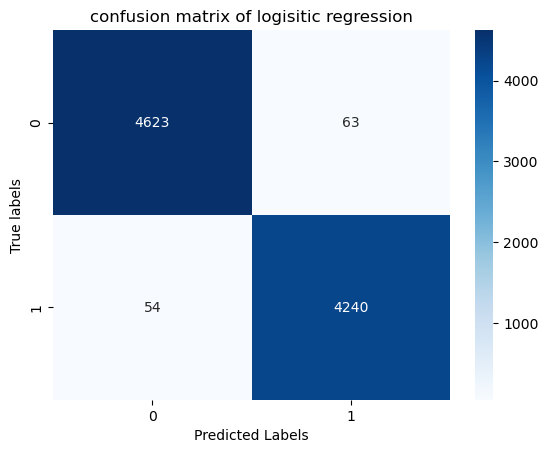

In [54]:
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True labels')
plt.title('confusion matrix of logisitic regression')
plt.show()

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
DT= DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [58]:
pred_dt= DT.predict(xv_test)
print(pred_dt)

[0 0 0 ... 1 1 1]


In [59]:
accuracy = accuracy_score(y_test,pred_dt)
print("Accuracy:",accuracy)

Accuracy: 0.9966592427616926


In [60]:
conf_mat = confusion_matrix(y_test,pred_dt)
print(conf_mat)

[[4673   13]
 [  17 4277]]


In [61]:
DT.score(xv_test,y_test)

0.9966592427616926

In [62]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4686
           1       1.00      1.00      1.00      4294

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



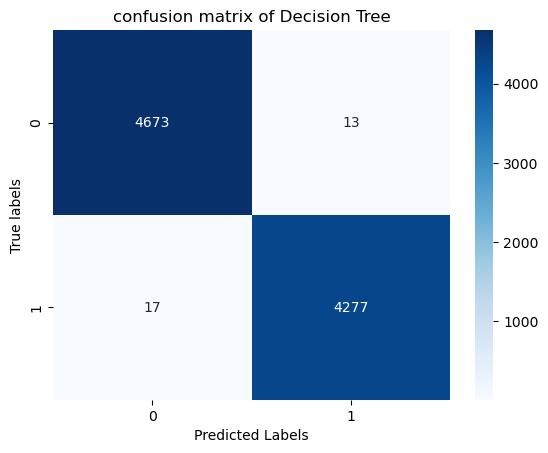

In [63]:
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True labels')
plt.title('confusion matrix of Decision Tree')
plt.show()

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rfc= RandomForestClassifier(random_state=0)
rfc.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [66]:
pred_rfc= rfc.predict(xv_test)
print(pred_rfc)

[0 0 0 ... 1 1 1]


In [67]:
accuracy = accuracy_score(y_test,pred_rfc)
print("Accuracy:",accuracy)

Accuracy: 0.9893095768374165


In [68]:
conf_mat = confusion_matrix(y_test,pred_rfc)
print(conf_mat)

[[4630   56]
 [  40 4254]]


In [69]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4686
           1       0.99      0.99      0.99      4294

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



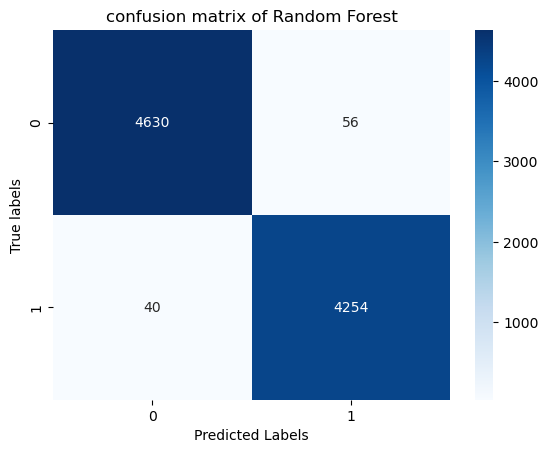

In [70]:
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True labels')
plt.title('confusion matrix of Random Forest')
plt.show()

In [71]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [72]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = p.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    
    pred_RFC = rfc.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                         
                                                                                                            output_lable(pred_RFC[0])))

In [74]:
news = str(input())
manual_testing(news)

Paul Craig RobertsIn the last years of the 20th century fraud entered US foreign policy in a new way.  On false pretenses Washington dismantled Yugoslavia and Serbia in order to advance an undeclared agenda. In the 21st century this fraud multiplied many times. Afghanistan, Iraq, Somalia, and Libya were destroyed, and Iran and Syria would also have been destroyed if the President of Russia had not prevented it.  Washington is also behind the current destruction of Yemen, and Washington has enabled and financed the Israeli destruction of Palestine.  Additionally, Washington operated militarily within Pakistan without declaring war, murdering many women, children, and village elders under the guise of  combating terrorism.  Washington s war crimes rival those of any country in history.I have documented these crimes in my columns and books (Clarity Press). Anyone who still believes in the purity of Washington s foreign policy is a lost soul  Russia and China now have a strategic alliance 